# INTRODUCTION

Malls and Shopping complexes are often indulged in a race to increase their customers and hence making huge profits. By analyzing this dataset, we are going to build a model to segment the customers based on their Gender, Age, Annual Income and Spending score .
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.


Two Tasks has given:-


1.Segement based on the users spending whether the particular customer 
belongs to which group (General, Miser,Target,Careful,Spendthrift, Centroid).

2.Segment the data based on the age of the customer.


# Approach - Machine Learning

Approach - Machine Learning
Unsupervised Learning is a class of Machine Learning techniques to find the patterns in data. The data given to unsupervised algorithm are not labelled, which means only the input variables(X) are given with no corresponding output variables. In unsupervised learning, the algorithms are left to themselves to discover interesting structures in the data.
There are some analytics techniques that can help you with segmenting your customers. These are useful especially when you have a large number of customers and it’s hard to discover patterns in your customer data just by looking at transactions. 

Clustering

Clustering is an exploration technique for datasets where relationships between different observations may be too hard to spot with the eye.

# Basic Imports

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly as px
import plotly.express as px

from mpl_toolkits.mplot3d import Axes3D 
import plotly as py
import plotly.graph_objs as go
from sklearn.impute import KNNImputer
import category_encoders as ce
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv(r"C:\Users\user\Desktop\notes\project\Mall_Customers_Analysis\Mall_Customers.csv")

In [3]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                    39.0   
1           2    Male   21                  15                    81.0   
2           3  Female   20                  16                     6.0   
3           4  Female   23                  16                    77.0   
4           5  Female   31                  17                    40.0   

           City  
0      New York  
1       Seattle  
2  Los Angeles.  
3      Chicago.  
4      Houston.

Here we have the following features :

CustomerID: It is the unique ID given to a customer

Gender: Gender of the customer

Age: The age of the customer

Annual Income(k$): It is the annual income of the customer

Spending Score: It is the score(out of 100) given to a customer by the mall authorities, based on the money spent and the behavior of the customer.

City: It Consist cities names.

In [4]:
df.describe()

CustomerID          Age  Annual Income (k$)  Spending Score (1-100)
count  1180.000000  1180.000000         1180.000000              942.000000
mean    590.500000    37.718644           59.727119               50.152866
std     340.780966    12.703662           25.574620               25.255422
min       1.000000    18.000000           15.000000                1.000000
25%     295.750000    28.000000           40.000000               35.000000
50%     590.500000    36.000000           61.000000               50.000000
75%     885.250000    47.000000           77.000000               72.000000
max    1180.000000    70.000000          137.000000               99.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              1180 non-null   int64  
 1   Gender                  1180 non-null   object 
 2   Age                     1180 non-null   int64  
 3   Annual Income (k$)      1180 non-null   int64  
 4   Spending Score (1-100)  942 non-null    float64
 5   City                    1180 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 55.4+ KB


In [6]:
df.isnull().sum()

CustomerID                  0
Gender                      0
Age                         0
Annual Income (k$)          0
Spending Score (1-100)    238
City                        0
dtype: int64

# DATA CLEANSING

In [7]:
data = df.copy()

In [8]:
data.drop('CustomerID', axis=1,inplace= True)

In [9]:
data.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)          City
0    Male   19                  15                    39.0      New York
1    Male   21                  15                    81.0       Seattle
2  Female   20                  16                     6.0  Los Angeles.
3  Female   23                  16                    77.0      Chicago.
4  Female   31                  17                    40.0      Houston.

By observing data , i found that there are 238 null values which is 20 percent of the acutal data . And also there are some miss-spelled cities names. So in Data Cleansing part, we are going to fill those null values and correct those cities names.

 1. Correcting City names

In [10]:
data['City'] = data['City'].replace(['Los Angeles.','Chicago.','Houston.','Phoenix.','Philadelphia.','San Antonio.'],['Los Angeles','Chicago','Houston','Pheonix','Philadelphia','San Antonio'])

In [11]:
data['City'].unique()

array(['New York', 'Seattle', 'Los Angeles', 'Chicago', 'Houston',
       'Pheonix', 'Philadelphia', 'San Antonio', 'San Diego',
       'Washington'], dtype=object)

2. Filling Null Values

Visualizing null values from Data set

<AxesSubplot:>

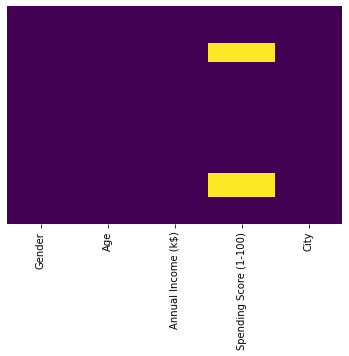

In [12]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

1st Challenge, in this case our null value counts are around 238 which is above 20% of the data . 


KNNimputer is a scikit-learn class used to fill out or predict the missing values in a dataset. It is a more useful method which works on the basic approach of the KNN algorithm rather than the naive approach of filling all the values with mean or the median.So i am going to use KNN imputer to fill those missing values.

Using KNN imputer to fill null values 

In [13]:
df5=df.copy()

In [14]:
enc = ce.OrdinalEncoder(cols=[ 'Gender', 'City'])

we converted the 'Gender' column to numeric using the 'Category Encoder'.

Male --> 1 , Female -->2

In [15]:
df5 = enc.fit_transform(df5)

In [16]:
impute_knn = KNNImputer(n_neighbors=3)
df5.iloc[:,:]= impute_knn.fit_transform(df5)

In [17]:
df5.head()

CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)  City
0         1.0     1.0  19.0                15.0                    39.0   1.0
1         2.0     1.0  21.0                15.0                    81.0   2.0
2         3.0     2.0  20.0                16.0                     6.0   3.0
3         4.0     2.0  23.0                16.0                    77.0   4.0
4         5.0     2.0  31.0                17.0                    40.0   5.0

In [18]:
df5.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
City                      0
dtype: int64

After Imputating Missing Values.

<AxesSubplot:>

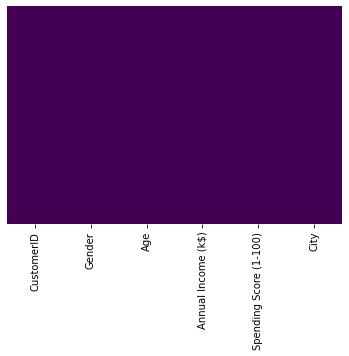

In [19]:
sns.heatmap(df5.isnull(),yticklabels=False,cbar=False,cmap="viridis")

Coverting float values into integer. 

In [20]:
df5['Spending Score (1-100)'] = df5['Spending Score (1-100)'].astype(int)

In [21]:
df5['Annual Income (k$)'] = df5['Annual Income (k$)'].astype(int)

In [22]:
df5['Spending Score (1-100)'].dtype

dtype('int32')

# TASK NO. 1

Now we going to segement based on the users spending whether the particular customer 
belongs to which group (General, Miser,Target,Careful,Spendthrift, Centroid).

For Segmentation i am going to use Kmeans for making clusters based on Annual income and Spending Score.

Kmeans is best module for do segmentation.

In [23]:
df5.head()

CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)  City
0         1.0     1.0  19.0                  15                      39   1.0
1         2.0     1.0  21.0                  15                      81   2.0
2         3.0     2.0  20.0                  16                       6   3.0
3         4.0     2.0  23.0                  16                      77   4.0
4         5.0     2.0  31.0                  17                      40   5.0

In [24]:
clustering_data = df5.iloc[:,[3,4]]
clustering_data.head()

Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40

In [25]:
x= df5.iloc[:,[3,4]].values
x

array([[15, 39],
       [15, 81],
       [16,  6],
       ...,
       [88, 72],
       [93,  5],
       [93, 93]])

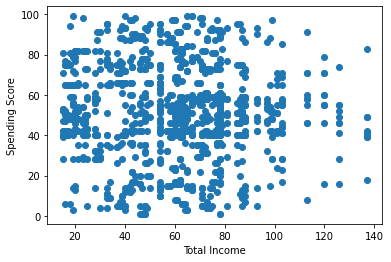

In [26]:
plt.scatter(x[...,0],x[...,1])
plt.xlabel('Total Income')
plt.ylabel("Spending Score")
plt.show()

In [27]:
# pca_d = PCA(n_components=2)
# X = pca_d.fit_transform(x)

# Elbow Method

The WCSS value is calculated for every case where the number of clusters is from 1 to 10, and the optimal number of clusters was determined as '5' from the below example (also, this point called the elbow point). The thing taken into account when determining the number of clusters is the part of the graph where the most breakage occurs. The name of this method is the 'Elbow' Method because the part with the most breakage looks like a real elbow.

In [28]:
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', max_iter = 300, n_init = 10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [29]:
wcss

[1450618.9152542346,
 916818.3554004371,
 598445.6852602089,
 443813.6269209633,
 346801.61856114224,
 277358.903663698,
 238712.37195201067,
 201530.93214695403,
 181312.1322190002,
 165780.28682000446]

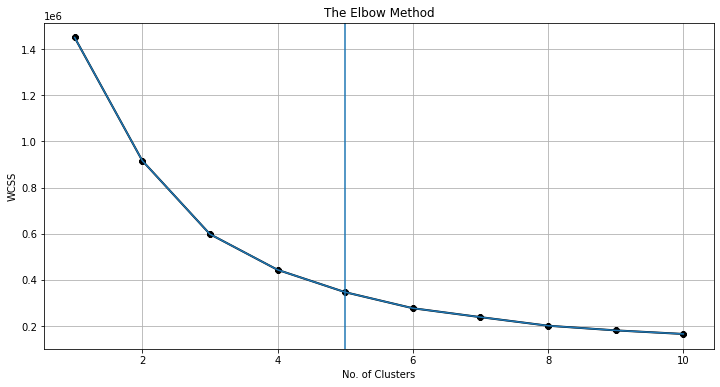

In [135]:
fig, ax = plt.subplots(figsize=(12,6))
plt.grid()
ax = plt.plot(range(1,11),wcss, linewidth=2, color="black", marker ="8")
plt.axvline(x=5, ls='-')
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

'5' is optimum number of clusters. Because the most break in the chart is at that point. This is how we will select the next optimal n_clusters.

In [31]:
km=KMeans(n_clusters=5,init='k-means++',random_state=0)
Y_kmeans = km.fit_predict(x)
Y_kmeans

array([3, 3, 2, ..., 4, 2, 0])

In [32]:
x

array([[15, 39],
       [15, 81],
       [16,  6],
       ...,
       [88, 72],
       [93,  5],
       [93, 93]])

In [33]:
x[Y_kmeans==0,0]

array([18, 19, 23, 29, 33, 33, 37, 38, 69, 70, 71, 71, 71, 72, 73, 73, 74,
       75, 76, 77, 77, 78, 78, 78, 78, 78, 78, 79, 81, 85, 86, 87, 88, 93,
       99, 30, 33, 33, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54,
       54, 54, 54, 54, 54, 54, 60, 60, 60, 61, 61, 62, 62, 63, 63, 63, 64,
       65, 65, 67, 67, 70, 71, 71, 71, 73, 73, 74, 75, 76, 77, 77, 29, 33,
       38, 39, 39, 40, 40, 42, 43, 43, 44, 46, 46, 47, 48, 48, 48, 49, 50,
       54, 54, 54, 54, 54, 54, 57, 58, 59, 60, 60, 60, 61, 62, 62, 62, 63,
       63, 63, 64, 65, 65, 67, 67, 69, 71, 71, 71, 72, 73, 74, 75, 76, 77,
       77, 78, 30, 33, 37, 39, 39, 40, 40, 42, 43, 43, 44, 46, 46, 47, 48,
       48, 48, 49, 50, 54, 54, 54, 54, 54, 54, 57, 58, 59, 60, 60, 60, 61,
       62, 62, 62, 63, 63, 63, 64, 65, 65, 67, 67, 69, 71, 71, 71, 72, 73,
       74, 75, 76, 77, 77, 78, 30, 33, 37, 39, 39, 40, 40, 42, 43, 43, 44,
       46, 46, 47, 48, 48, 48, 49, 50, 54, 54, 54, 54, 54, 54, 57, 58, 59,
       60, 60, 60, 61, 62

In [146]:
df5.groupby(['Spending and Income Cluster']).CustomerID.count()

Spending and Income Cluster
0    206
1    247
2    107
3    338
4    282
Name: CustomerID, dtype: int64

In [35]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = km.fit_predict(clustering_data)
clusters.head()

Annual Income (k$)  Spending Score (1-100)  Cluster_Prediction
0                  15                      39                   3
1                  15                      81                   3
2                  16                       6                   2
3                  16                      77                   3
4                  17                      40                   3

In [38]:
clustering1 = KMeans(n_clusters=3)

In [39]:
clustering1.fit(df5[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [40]:
clustering1.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [41]:
df5['Income Clusters'] = clustering1.labels_
df5.head()

CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)  City  \
0         1.0     1.0  19.0                  15                      39   1.0   
1         2.0     1.0  21.0                  15                      81   2.0   
2         3.0     2.0  20.0                  16                       6   3.0   
3         4.0     2.0  23.0                  16                      77   4.0   
4         5.0     2.0  31.0                  17                      40   5.0   

   Income Clusters  
0                0  
1                0  
2                0  
3                0  
4                0

In [42]:
df5['Income Clusters'].value_counts()

2    540
0    444
1    196
Name: Income Clusters, dtype: int64

In [43]:
clustering1.inertia_

135570.18286449692

In [47]:
df5.groupby('Income Clusters')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

<ipython-input-47-47b490a4331c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df5.groupby('Income Clusters')['Age', 'Annual Income (k$)',


Age  Annual Income (k$)  Spending Score (1-100)
Income Clusters                                                       
0                37.560811           33.486486               52.427928
1                38.913265           98.887755               50.408163
2                37.414815           67.088889               50.288889

In [48]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df5[['Annual Income (k$)','Spending Score (1-100)']])
df5['Spending and Income Cluster'] =clustering2.labels_
df5.head()

CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)  City  \
0         1.0     1.0  19.0                  15                      39   1.0   
1         2.0     1.0  21.0                  15                      81   2.0   
2         3.0     2.0  20.0                  16                       6   3.0   
3         4.0     2.0  23.0                  16                      77   4.0   
4         5.0     2.0  31.0                  17                      40   5.0   

   Income Clusters  Spending and Income Cluster  
0                0                            4  
1                0                            4  
2                0                            0  
3                0                            4  
4                0                            4

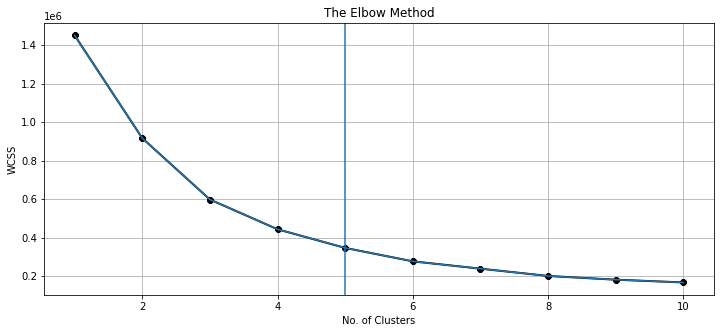

In [136]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df5[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)

fig, ax = plt.subplots(figsize=(12,5))
plt.grid()
ax = plt.plot(range(1,11),intertia_scores2, linewidth=2, color="black", marker ="8")
plt.axvline(x=5, ls='-')
plt.plot(range(1,11),intertia_scores2)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

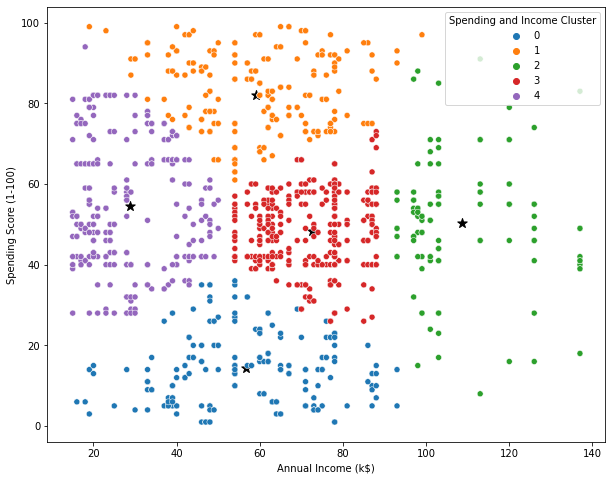

In [51]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df5, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [52]:
pd.crosstab(df5['Spending and Income Cluster'],df5['Gender'],normalize='index')

Gender                            1.0       2.0
Spending and Income Cluster                    
0                            0.470874  0.529126
1                            0.429150  0.570850
2                            0.392523  0.607477
3                            0.479290  0.520710
4                            0.404255  0.595745

In [53]:
df5.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

<ipython-input-53-04491f11c218>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df5.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)',


Age  Annual Income (k$)  \
Spending and Income Cluster                                  
0                            40.490291           56.728155   
1                            35.230769           59.028340   
2                            37.046729          108.551402   
3                            38.568047           72.476331   
4                            37.109929           28.723404   

                             Spending Score (1-100)  
Spending and Income Cluster                          
0                                         14.330097  
1                                         82.040486  
2                                         50.261682  
3                                         48.363905  
4                                         54.514184

In [54]:
df4 = df5[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender']]
df4.head()

Age  Annual Income (k$)  Spending Score (1-100)  Gender
0  19.0                  15                      39     1.0
1  21.0                  15                      81     1.0
2  20.0                  16                       6     2.0
3  23.0                  16                      77     2.0
4  31.0                  17                      40     2.0

In [55]:
scale = StandardScaler()
df4 = scale.fit_transform(df4)

In [56]:
df4 = pd.DataFrame(scale.fit_transform(df4))
df4.head()

0         1         2         3
0 -1.474109 -1.749628 -0.504806 -1.124667
1 -1.316607 -1.749628  1.245451 -1.124667
2 -1.395358 -1.710511 -1.880007  0.889152
3 -1.159106 -1.710511  1.078760  0.889152
4 -0.529099 -1.671393 -0.463133  0.889152

Visualising the clusters/segmentations :

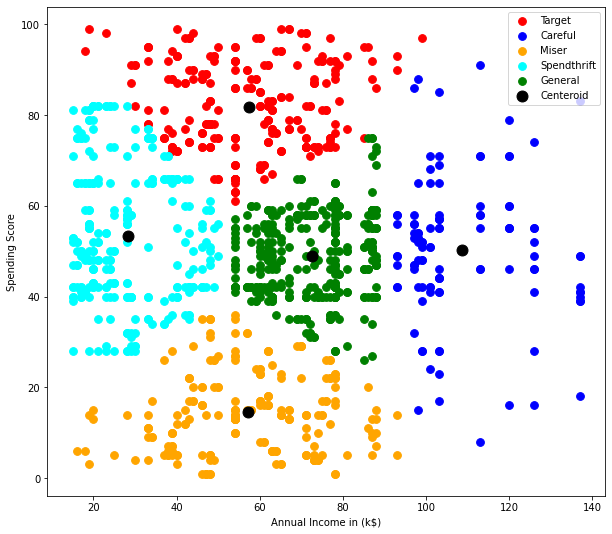

In [137]:
plt.scatter(x[Y_kmeans==0,0],x[Y_kmeans==0,1],c="r",s = 60,label="Target")
plt.scatter(x[Y_kmeans==1,0],x[Y_kmeans==1,1],c="blue",s = 60,label="Careful")
plt.scatter(x[Y_kmeans==2,0],x[Y_kmeans==2,1],c="orange",s = 60,label="Miser")
plt.scatter(x[Y_kmeans==3,0],x[Y_kmeans==3,1],c="cyan",s = 60,label="Spendthrift")
plt.scatter(x[Y_kmeans==4,0],x[Y_kmeans==4,1],c="green",s = 60,label="General")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 120, c = 'black' , label = 'Centeroid')
plt.legend()
plt.xlabel('Annual Income in (k$)')
plt.ylabel('Spending Score')
plt.rcParams["figure.figsize"] = (15,10)
plt.show()

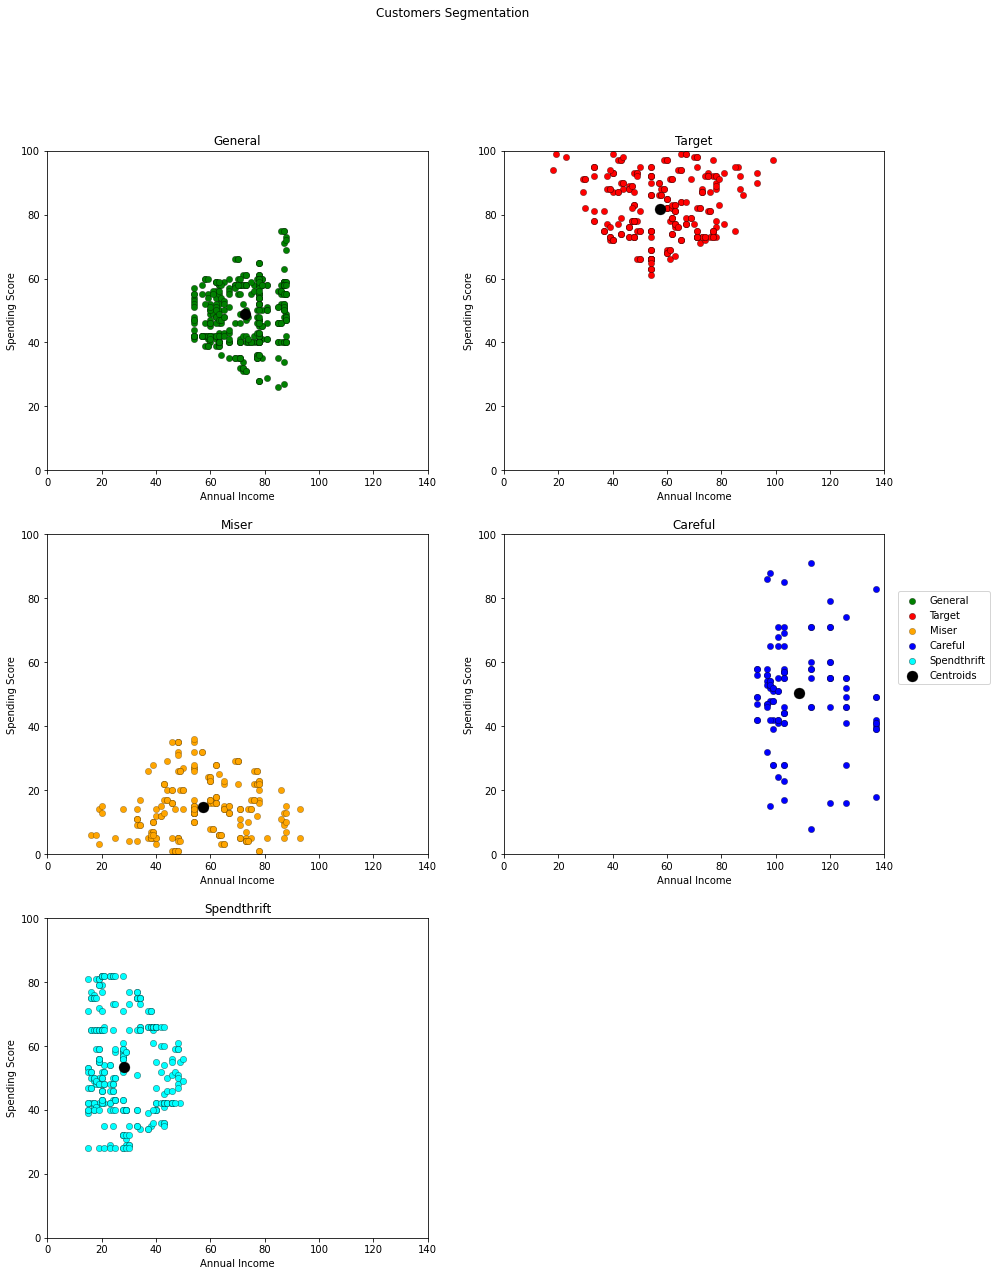

<Figure size 432x288 with 0 Axes>

In [36]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
ax[0,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending Score (1-100)'],
            s=40,edgecolor='black', linewidth=0.3, c='green', label='General')
ax[0,0].scatter(x=km.cluster_centers_[4,0], y=km.cluster_centers_[4,1],
                s = 120, c = 'black',edgecolor='black', linewidth=0.3)
ax[0,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='General')
ax[0,1].scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending Score (1-100)'],
            s=40,edgecolor='black', linewidth=0.3, c='r', label='Target')
ax[0,1].scatter(x=km.cluster_centers_[0,0], y=km.cluster_centers_[0,1],
                s = 120, c = 'black',edgecolor='black', linewidth=0.3)
ax[0,1].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Target')
ax[1,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending Score (1-100)'],
            s=40,edgecolor='black', linewidth=0.2, c='orange', label='Miser')
ax[1,0].scatter(x=km.cluster_centers_[2,0], y=km.cluster_centers_[2,1],
                s = 120, c = 'black',edgecolor='black', linewidth=0.3)
ax[1,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Miser')
ax[1,1].scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending Score (1-100)'],
            s=40,edgecolor='black', linewidth=0.3, c='blue', label='Careful')
ax[1,1].scatter(x=km.cluster_centers_[1,0], y=km.cluster_centers_[1,1],
                s = 120, c = 'black',edgecolor='black', linewidth=0.3)
ax[1,1].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Careful')
ax[2,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending Score (1-100)'],
            s=40,edgecolor='black', linewidth=0.3, c='cyan', label='Spendthrift')
ax[2,0].scatter(x=km.cluster_centers_[3,0], y=km.cluster_centers_[3,1],
                s = 120, c = 'black',edgecolor='black', linewidth=0.3, label='Centroids')
ax[2,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Spendthrift')
fig.delaxes(ax[2,1])
fig.legend(loc='right')
fig.suptitle('Customers Segmentation')
plt.show()
plt.savefig('Customers_Segmentation.png')


Analyzing Data using the above graph becomes much more easier as it gives us a visual aid for better understanding of the data.
Kmeans has divided the dataset into 5 segments based on Annual income and the Spending scores of the individual customers.
The following clusters are created by the model:-
General
Miser
Target
Careful
Spendthrift
Centroid

General :- In this Category , these types of Customers has Average Annual income with average Spending Score . Hence, we can conclude that these 
types of people are normal customers who buy and spent according their montly needs.These customers will not be the prime targets
of the shops or mall, but they can be considered.

Miser :- In this Category ,these types of Customers has Average and Below Average Annual income with low Spending Score . Hence, we can conclude 
that these types of people are Balanced customers.These customers will not be the prime targets of the shops or mall.

Careful :- In this Category ,these types of Customers has High Annual income with low Spending Score . Hence, we can conclude 
that these types of people are Careful customers who buy only what they want .These customers could be the targets of the 
shops or mall.Because their income is so high as compare to other customers.

Spendthrift :- In this Category , these types of Customers has low income with high Spending Score . Hence, we can conclude 
that these types of people are Shopoholics who buy blindly .These customers could be the targets of the 
shops or mall. Because they love to buy products more often even though they have a low income.

Target :-In this Category , these types of Customers has Average and above high income with high spending score. Hence, we can conclude that these
types of people are target constomers. These customers should be the prime targets of the shops or mall as these people are the
prime sources of profit.

Centroid :- Center of the segments.



# TASK NO. 2

Segment the data based on the age of the customer.

In [57]:
df5.head()

CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)  City  \
0         1.0     1.0  19.0                  15                      39   1.0   
1         2.0     1.0  21.0                  15                      81   2.0   
2         3.0     2.0  20.0                  16                       6   3.0   
3         4.0     2.0  23.0                  16                      77   4.0   
4         5.0     2.0  31.0                  17                      40   5.0   

   Income Clusters  Spending and Income Cluster  
0                0                            4  
1                0                            4  
2                0                            0  
3                0                            4  
4                0                            4

In [157]:
df5['Age'].value_counts().head()

32    56
35    48
31    44
30    40
49    40
Name: Age, dtype: int64

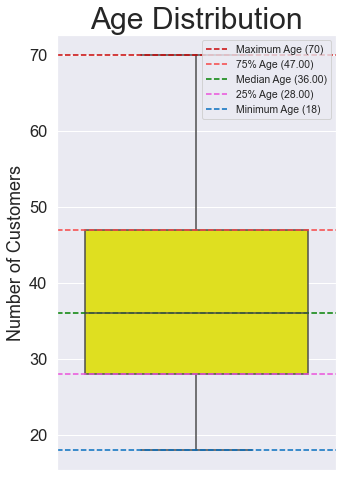

In [158]:
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=df5["Age"], color="Yellow")
ax.axhline(y=df5['Age'].max(), linestyle='--',color='#c90404', label=f'Maximum Age ({df5.Age.max()})')
ax.axhline(y=df5['Age'].describe()[6], linestyle='--',color='#f74343', label=f'75% Age ({df5.Age.describe()[6]:.2f})')
ax.axhline(y=df5['Age'].median(), linestyle='--',color='green', label=f'Median Age ({df5.Age.median():.2f})')
ax.axhline(y=df5['Age'].describe()[4], linestyle='--',color='#eb50db', label=f'25% Age ({df5.Age.describe()[4]:.2f})')
ax.axhline(y=df5['Age'].min(), linestyle='--',color='#046ebf', label=f'Minimum Age ({df5.Age.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('Number of Customers')
plt.title('Age Distribution', fontsize = 30)
plt.show()

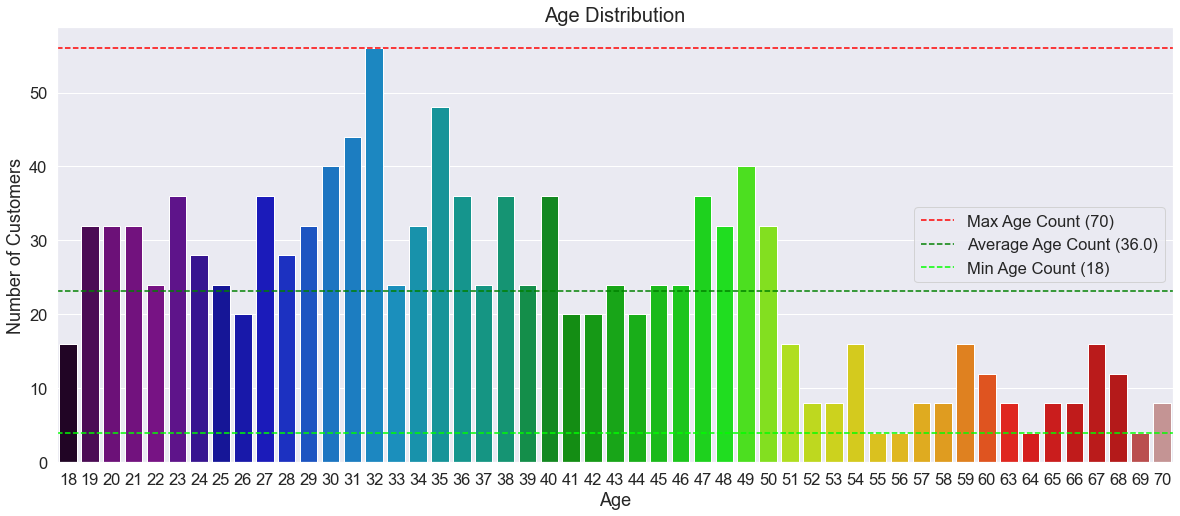

In [167]:
fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=df5['Age'], palette='nipy_spectral')
ax.axhline(y=df5['Age'].value_counts().max(), linestyle='--',color='red', label=f'Max Age Count ({df5.Age.max()})')
ax.axhline(y=df5['Age'].value_counts().mean(), linestyle='--',color='green', label=f'Average Age Count ({df5.Age.median():.1f})')
ax.axhline(y=df5['Age'].value_counts().min(), linestyle='--',color='lime', label=f'Min Age Count ({df5.Age.min()})')
ax.legend(loc ='right')
ax.set_ylabel('Number of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

In [98]:
model = KMeans(n_clusters=3)

In [99]:
res = model.fit_predict(cluster_age)

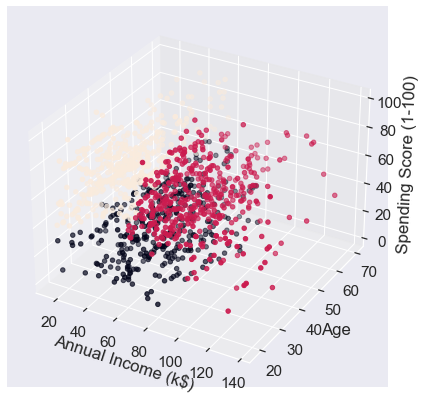

In [558]:
income = df5['Annual Income (k$)']
Age = df5["Age"]
Score = df5['Spending Score (1-100)']
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(income, Age, Score , c=res)
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Age')
ax.set_zlabel('Spending Score (1-100)')
plt.savefig('3D-Age-Annual-Spendingscore.png')

# Classification Of Customers Age.

1. Between 18 and 30 years – a young adult Age.

2. In the range of 30 to 45 – is the Middle age.

3. From 46 to 60 – people are considered elderly / The Late Middle Age.

4. With 61 to 90 – it is the representatives of old age.

In [120]:
a_lst = []
Young_Adult_Age = ''
Middle_Age = ''
Elderly_Middle_Age= ''
Old_Age= ''
for i in df5['Age']:
    if i > 17 and i <= 30 :
        Young_Adult_Age = 'Young Adult Aged'
        a_lst.append(Young_Adult_Age)
    elif i > 30 and i <= 45  :
        Middle_Age = 'Middle-Aged'
        a_lst.append(Middle_Age)
    elif i > 45 and i <= 60:
        Elderly_Middle_Age = 'Elderly / Late Middle Aged'
        a_lst.append(Elderly_Middle_Age)
    elif i > 60 and i <= 90 :
        Old_Age = 'Old-Aged'
        a_lst.append(Old_Age)
    else :
        pass

In [58]:
cluster_age = df5.iloc[:,[2,3,4]]
cluster_age.head()

Age  Annual Income (k$)  Spending Score (1-100)
0  19.0                  15                      39
1  21.0                  15                      81
2  20.0                  16                       6
3  23.0                  16                      77
4  31.0                  17                      40

In [63]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [64]:
data_scd=df5.copy()

In [68]:
df5['Age'] = df5['Age'].astype(int)
df5['CustomerID'] = df5['CustomerID'].astype(int)
df5['Gender'] = df5['Gender'].astype(int)
df5['City'] = df5['City'].astype(int)

In [72]:
column_to_scale = ['Age','Annual Income (k$)','Spending Score (1-100)']

In [76]:
data_scd[column_to_scale] = scaler.fit_transform(df5[column_to_scale])

In [77]:
data_scd[column_to_scale].describe()

Age  Annual Income (k$)  Spending Score (1-100)
count  1.180000e+03        1.180000e+03            1.180000e+03
mean  -4.591431e-17        3.500025e-17           -5.664019e-17
std    1.000424e+00        1.000424e+00            1.000424e+00
min   -1.552860e+00       -1.749628e+00           -2.088371e+00
25%   -7.653513e-01       -7.716824e-01           -5.048056e-01
50%   -1.353447e-01        4.979237e-02           -4.732332e-03
75%    7.309145e-01        6.756779e-01            8.287232e-01
max    2.542184e+00        3.022749e+00            1.995561e+00

In [93]:
df5.head(1)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  City  \
0           1       1   19                  15                      39     1   

   Income Clusters  Spending and Income Cluster     Cluster  
0                0                            4  Low_Income

In [96]:
mod = KMeans(n_clusters=4, random_state=0)
mod.fit(data_scd[column_to_scale])
data_scd['Cluster_(A.A.S)'] = mod.predict(data_scd[column_to_scale])

In [95]:
df5['Cluster_(A.A.S)']=data_scd['Cluster_(A.A.S)']
df5.groupby('Cluster_(A.A.S)')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

Age  Annual Income (k$)  Spending Score (1-100)
Cluster_(A.A.S)                                                       
0                36.171315           52.856574               20.167331
1                29.089595           79.791908               61.913295
2                34.022801           33.169381               67.599349
3                54.054348           70.362319               47.380435

In [495]:
fig = px.scatter_3d(data_frame=eda, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',color = 'Cluster_(A.A.S)', size = 'Cluster_(A.A.S)')
fig.show()
plt.savefig('Customers_Segmentation.png')

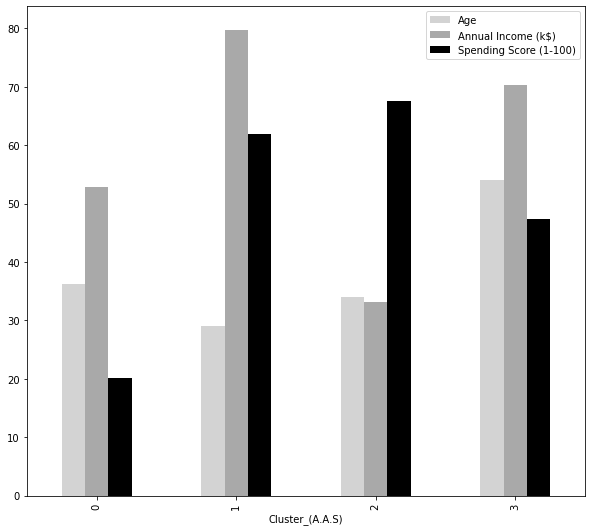

<Figure size 1080x648 with 0 Axes>

In [118]:
df5.groupby('Cluster_(A.A.S)')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean().plot.bar(color=['lightgray','darkgray','black'])
plt.figure(figsize= (15,9))
plt.show()

Cluster 0: In this category, Customers are Middle-aged people between 30-40 who have moderate income with low spending score.
They are responsible family members earning a considerable income and having a status in the society. These types of customers are generally proud of their achievements, possession and position. Such customers, because of their age and experience are proud of themselves. They are very much conscious about the quality but not about fashion.
Shops or malls owners should bring some offers for these people. So that they could increase their purchases.

(Tips:- 
1. Shops or malls should be very clever and tactful while dealing with middle-aged customers. Owners should never try to bluff them about the quality and price of goods. 
2. Shops or malls owners should compliment them for their achievements and status in the society. And must emphasize on buying motives like pride, possession, and profit to win over the customers.)
    
Cluster 1: In this category, Customers are young-aged people between 20-30 who have High Annual income with high spending score.They are generally impatient as well as smart. They generally want to enjoy life by purchasing the most up-to-date and fashionable commodities. Because of their impatience, they get irritated soon. As such they take quick decisions in purchases. They are very particular about fashion, latest design and colour. They lack experience in purchasing articles and are also not argumentative.These Customers should be considered as the prime targets of the shops or malls.

(Tips:- 
1. These customers should be provided with the latest designs and colours to make a choice.)
    
Cluster 2:In this category, Customers are Middle-aged people between 30-35 who have low Annual income with high spending score.
These Customers can also be considered as the prime targets of the shops or malls.

(Tips:- 
1. Shops or malls should be very clever and tactful while dealing with middle-aged customers. Owners should never try to bluff them about the quality and price of goods. 
2. Shops or malls owners should compliment them for their achievements and status in the society. And must emphasize on buying motives like pride, possession, and profit to win over the customers.)
    
Cluster 3: In this category, Customers are Old-aged people between 50-60 who have low Annual income with moderate spending score. Elderly and old aged customers generally are experienced in buying goods. These customers are serious and cautious in money matters. They do not like to be advised by the salesman. They feel proud if they are given respect and consulted. They like to be appreciated for their experience and wisdom. These Customers can also be considered as the targets of the shops or malls.

(Tips:-
1. Its not easy to satisfy Elderly customers. The salesman should appreciate their wisdom and experience. He should try to give as much respect as he can and try to seek advice in order to please them.
2. They are very sensitive and, therefore, the salesman should be very cautious in his approach. The salesman has to talk about every detail of the goods to these customers and therefore, the sale takes a long time.)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

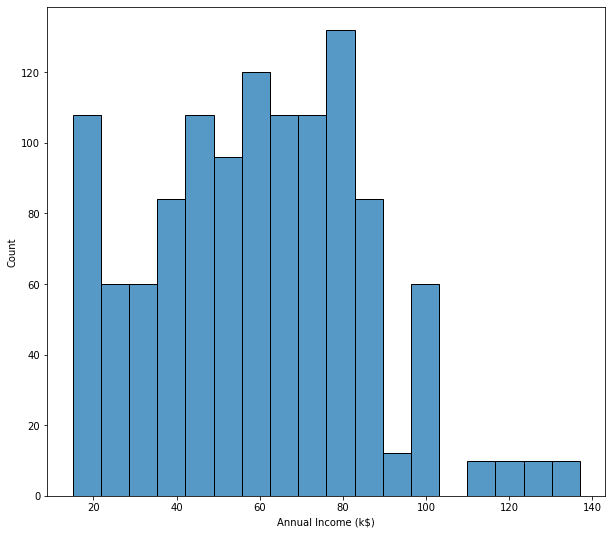

In [113]:
sns.histplot(data=df5, x="Annual Income (k$)")

Beyond 90k, the frequency in the bins falls sharply and it seems that these customers can naturally be considered a separate group representing high-income customers. A good proportion of customers seems to lie in the 50k-90k range. These can be considered moderate-income customers. Customers earning less than 40k would be low-income customers

In [60]:
df5['Cluster']=np.where(df5["Annual Income (k$)"] >= 90, 'High_Earners',np.where(df5['Annual Income (k$)'] < 50, 'Low_Income', 'Moderate_Income'))

In [61]:
df5.groupby('Cluster')['Annual Income (k$)'].describe()

count        mean        std   min   25%    50%    75%    max
Cluster                                                                       
High_Earners     112.0  107.910714  13.439590  93.0  98.0  103.0  120.0  137.0
Low_Income       432.0   33.027778  11.026615  15.0  22.5   33.5   43.0   49.0
Moderate_Income  636.0   69.377358  10.609566  50.0  61.0   70.0   78.0   88.0

In [121]:
df5['Customer Identification'] = pd.DataFrame(a_lst)

In [125]:
df5.head(3)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  City  \
0           1       1   19                  15                      39     1   
1           2       1   21                  15                      81     2   
2           3       2   20                  16                       6     3   

   Income Clusters  Spending and Income Cluster     Cluster  Cluster_(A.A.S)  \
0                0                            4  Low_Income                2   
1                0                            4  Low_Income                2   
2                0                            0  Low_Income                0   

  Customer Identification  
0        Young Adult Aged  
1        Young Adult Aged  
2        Young Adult Aged

# GENDER SUMMARY

In [490]:
spending_male = 0
spending_female = 0

for i in range(len(df5)):
    if df5['Gender'][i] == 1:
        spending_male = spending_male + df5['Spending Score (1-100)'][i]
    if df5['Gender'][i] == 2:
        spending_female = spending_female + df5['Spending Score (1-100)'][i]


print('\033[1m' + '\033[93m' + f'Males Spending Score  : {spending_male}')
print('\033[1m' + '\033[93m' + f'Females Spending Score: {spending_female}')

Males Spending Score  : 25728
Females Spending Score: 34586


Female    659
Male      521
Name: Gender, dtype: int64

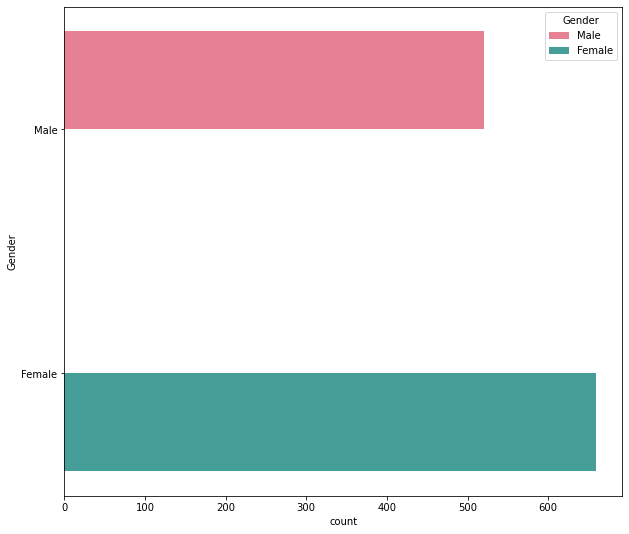

In [127]:
sns.countplot(y = 'Gender', data = data, palette="husl", hue = "Gender")
data["Gender"].value_counts()

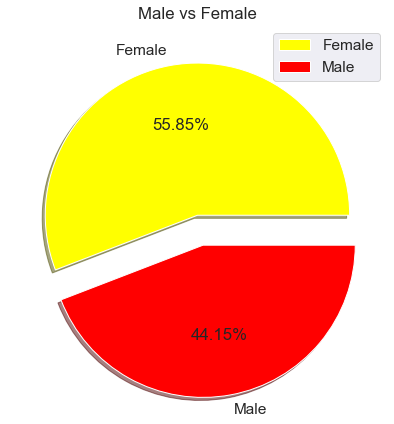

In [559]:
la=["Female","Male"]
size=[659,521]
colors=['Yellow','Red']
exp=[0,0.2]
plt.rcParams['figure.figsize']=(7,7)
plt.pie(size,colors=colors,explode=exp,labels = la ,shadow= True , autopct ='%.2f%%')
plt.title('Male vs Female')
#plt.axis('off')
plt.legend()
plt.show
plt.savefig('MalevsFemale.png')

1.Female has more counts than Male.

2.We can assume that Female do more shopping than Male.

3.Female    659 - 55.85%

4.Male      521 - 44.15%

In [179]:
Male_data= data[data['Gender']=='Male']['Age'].describe()
Female_data = data[data['Gender']=='Female']['Age'].describe()

In [295]:
Female_age= data[data['Gender']=='Female']['Age'].value_counts()
Male_age=data[data['Gender']=='Male']['Age'].value_counts()

In [286]:
Male_data

count    521.000000
mean      37.570058
std       12.916276
min       18.000000
25%       28.000000
50%       36.000000
75%       47.000000
max       70.000000
Name: Age, dtype: float64

In [287]:
Female_data

count    659.000000
mean      37.836115
std       12.541621
min       18.000000
25%       28.000000
50%       36.000000
75%       47.000000
max       70.000000
Name: Age, dtype: float64

Comparison between Male and Female Age Distribution

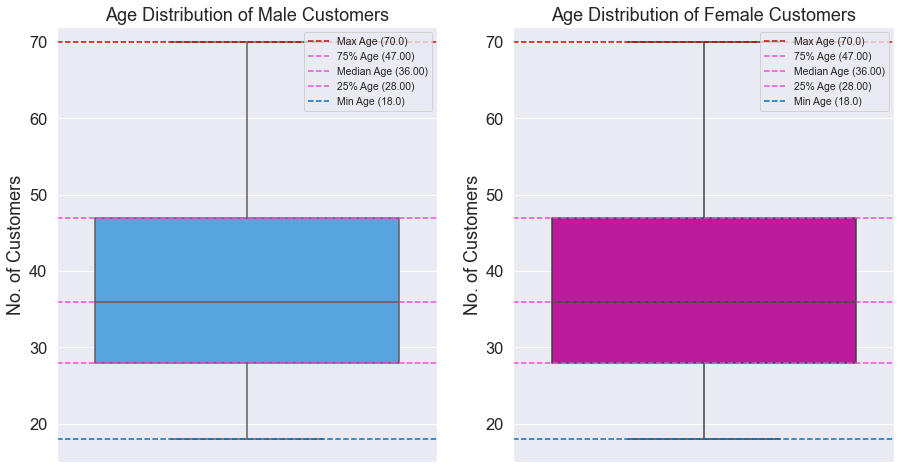

In [182]:
fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
sns.set(font_scale=1.5)
sns.boxplot(y=data[data['Gender']=='Male']['Age'], color="#42a7f5", ax=ax0)
ax0.axhline(y=data['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({Male_data[7]})')
ax0.axhline(y=Male_data[6], linestyle='--',color='#eb50db', label=f'75% Age ({Male_data[6]:.2f})')
ax0.axhline(y=Male_data[5], linestyle='--',color='#eb50db', label=f'Median Age ({Male_data[5]:.2f})')
ax0.axhline(y=Male_data[4], linestyle='--',color='#eb50db', label=f'25% Age ({Male_data[4]:.2f})')
ax0.axhline(y=Male_data[3], linestyle='--',color='#046ebf', label=f'Min Age ({Male_data[3]})')
ax0.legend(fontsize='xx-small', loc='upper right')
ax0.set(ylabel='No. of Customers', title='Age Distribution of Male Customers')
ax0.set_ylim(15,72)

ax1 = sns.boxplot(y=data[data['Gender']=='Female']['Age'], color="#d400ad", ax=ax1)
ax1.axhline(y=Female_data[7], linestyle='--',color='#c90404', label=f'Max Age ({Female_data[7]})')
ax1.axhline(y=Female_data[6], linestyle='--',color='#eb50db', label=f'75% Age ({Female_data[6]:.2f})')
ax1.axhline(y=Female_data[5], linestyle='--',color='#eb50db', label=f'Median Age ({Female_data[5]:.2f})')
ax1.axhline(y=Female_data[4], linestyle='--',color='#eb50db', label=f'25% Age ({Female_data[4]:.2f})')
ax1.axhline(y=Female_data[3], linestyle='--',color='#046ebf', label=f'Min Age ({Female_data[3]})')
ax1.legend(fontsize='xx-small', loc='upper right')
ax1.set(ylabel='No. of Customers', title='Age Distribution of Female Customers')
ax1.set_ylim(15,72)

plt.show()

There is no major difference between Male and Female.

Maximum age is 70 in Male as well as in Female.

Minimum age is 18 in Male as well as in Female.

Median age is 36 in Male as well as in Female.


# what is the most frequently age of customers by gender ? 

In [300]:
Male_age.head()

32    26
31    22
48    22
19    20
35    20
Name: Age, dtype: int64

In [301]:
Female_age.head()

32    30
35    28
49    26
23    26
36    24
Name: Age, dtype: int64

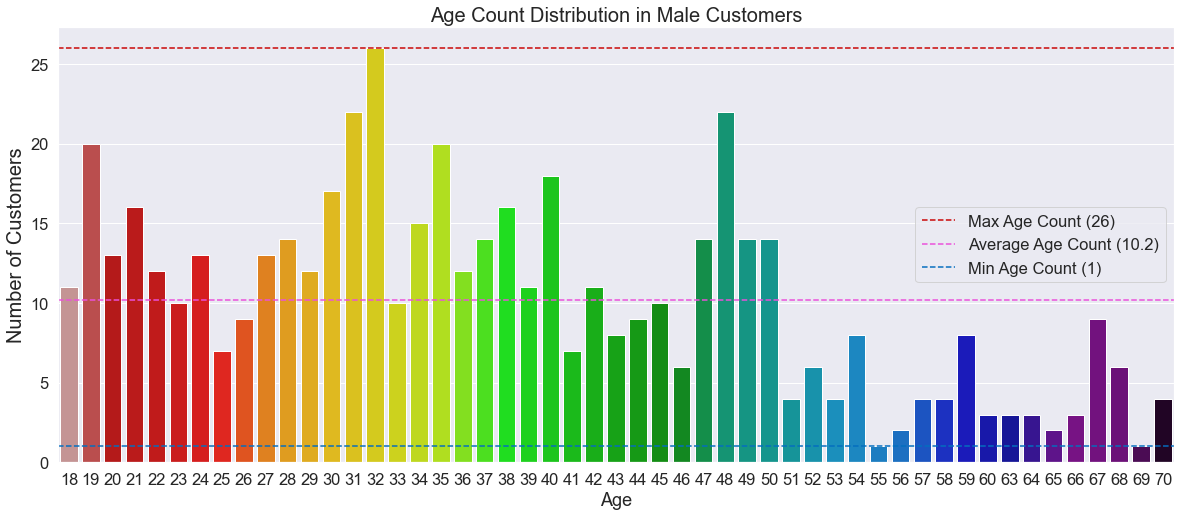

In [185]:
m_x = data[data['Gender']=='Male'].Age.value_counts().max()
m_n = data[data['Gender']=='Male'].Age.value_counts().mean()
m_ni = data[data['Gender']=='Male'].Age.value_counts().min()
fig, po = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
po = sns.countplot(x=data[data['Gender']=='Male'].Age, palette='nipy_spectral_r')
po.axhline(y=m_x, linestyle='--',color='#c90404', label=f'Max Age Count ({m_x})')
po.axhline(y=m_n, linestyle='--',color='#eb50db', label=f'Average Age Count ({m_n:.1f})')
po.axhline(y=m_ni, linestyle='--',color='#046ebf', label=f'Min Age Count ({m_ni})')
po.set_ylabel('Number of Customers', fontsize=20 )
po.legend(loc ='right')
plt.title('Age Count Distribution in Male Customers', fontsize = 20)
plt.show()

Age 32 has most counts in Male Customers.
And with that we can see downfall of peak after the age 50 .

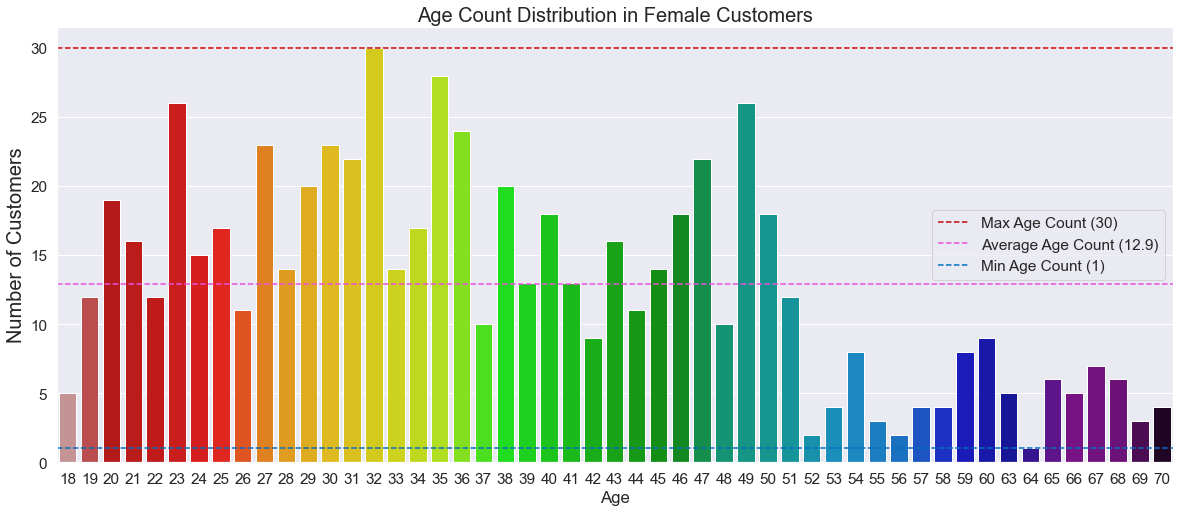

In [187]:
mx = data[data['Gender']=='Female'].Age.value_counts().max() 
mn = data[data['Gender']=='Female'].Age.value_counts().mean()
mni = data[data['Gender']=='Female'].Age.value_counts().min()
fig, po = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.4)
po = sns.countplot(x=data[data['Gender']=='Female'].Age, palette='nipy_spectral_r')
po.axhline(y=mx, linestyle='--',color='#c90404', label=f'Max Age Count ({mx})')
po.axhline(y=mn, linestyle='--',color='#eb50db', label=f'Average Age Count ({mn:.1f})')
po.axhline(y=mni, linestyle='--',color='#046ebf', label=f'Min Age Count ({mni})')
po.set_ylabel('Number of Customers', fontsize = 20 )
po.legend(loc ='right')
plt.title('Age Count Distribution in Female Customers', fontsize = 20)
plt.show()

Age 32 has most counts in Female.

# What is the most common salary frequency?

Text(0.5, 1.0, 'Customers with Annual Income')

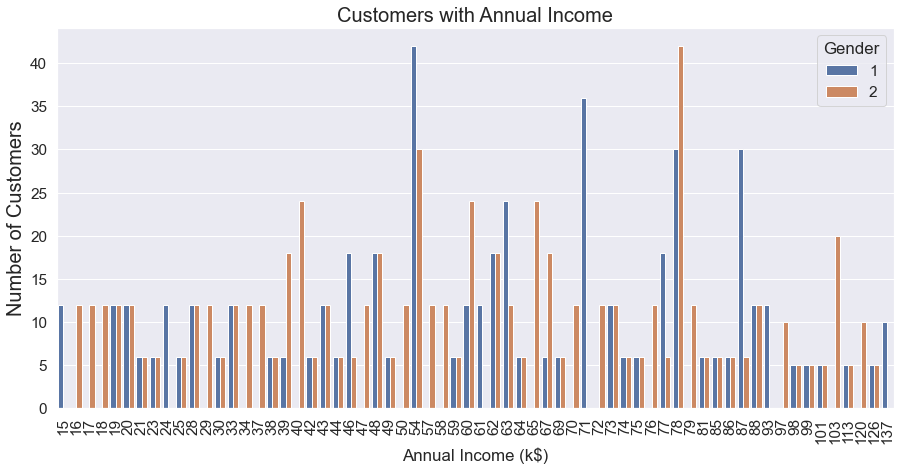

In [318]:
plt.figure(figsize = (15,7))
plt.xticks(rotation=90)
sns.countplot(x = 'Annual Income (k$)',hue='Gender' ,data = df5)
plt.ylabel('Number of Customers', fontsize = 20 )
plt.title('Customers with Annual Income', fontsize = 20)

The most common salaries in male is 54(k$) , 71(k$) , 78(k$) and 87(k$)
as in female it is 54(k$) and 78(k$) per year.

We can say , male earns more than females.


In [312]:
Male_salary= data[data['Gender']=='Male']["Annual Income (k$)"].describe()
Female_salary = data[data['Gender']=='Female']["Annual Income (k$)"].describe()
print('Male=', Male_salary,'\n','\n'
'Female =' ,Female_salary)

Male= count    521.000000
mean      61.506718
std       25.876193
min       15.000000
25%       44.000000
50%       62.000000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64 
 
Female = count    659.000000
mean      58.320182
std       25.264661
min       16.000000
25%       39.000000
50%       59.000000
75%       76.000000
max      126.000000
Name: Annual Income (k$), dtype: float64


The most typical earning is 54k and 78k $. All data are based on 1180 customers from mall. 
Salaries are different between men and women. 

Men receive an average salary of 61.506718$.

Women receive an average salary of 58.320182$.

Men's are earning more than women.

Highest paid between male and female is male .


# Who spends more- men or women?

Text(0.5, 1.0, 'Male vs Female on Spending Score')

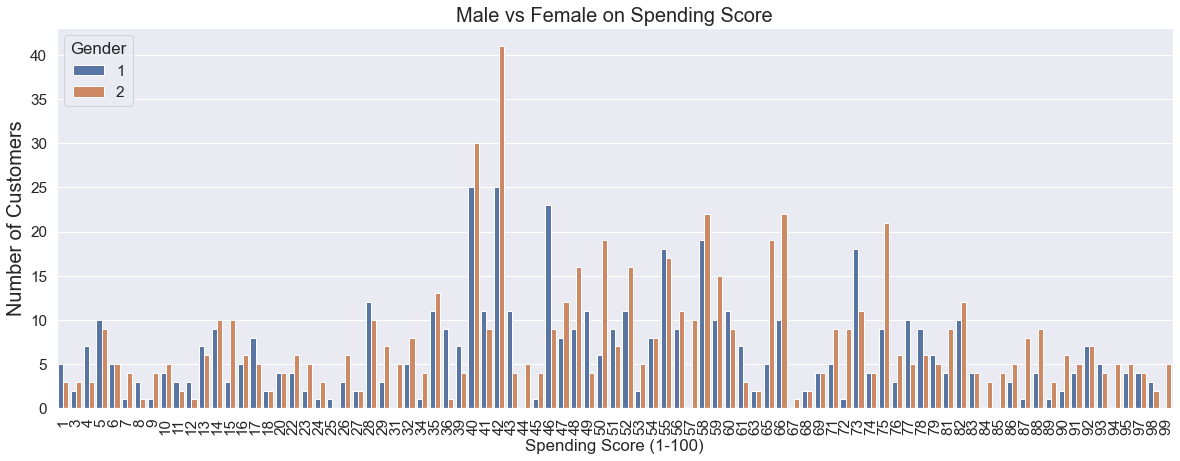

In [316]:
plt.figure(figsize = (20,7))
plt.xticks(rotation=90)
sns.countplot(x = 'Spending Score (1-100)', hue= "Gender", data = df5)
plt.ylabel('Number of Customers', fontsize = 20 )
plt.title('Male vs Female on Spending Score', fontsize = 20)

Women spends more than men. It’s only that females enjoy shopping more than males do

The correlation between three attributes(Age, Annual Income ,Spending Score) by gender.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



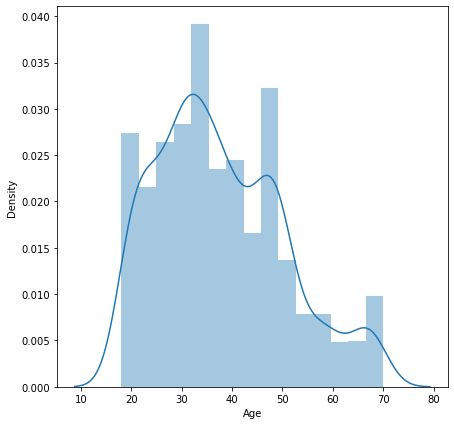

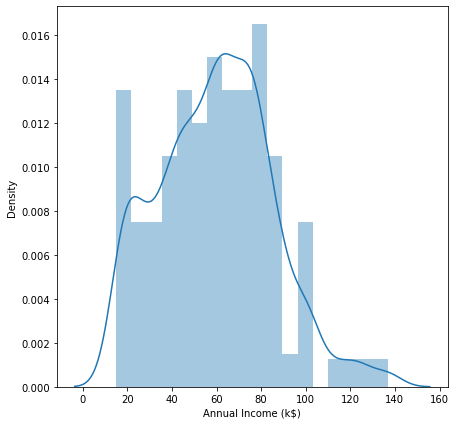

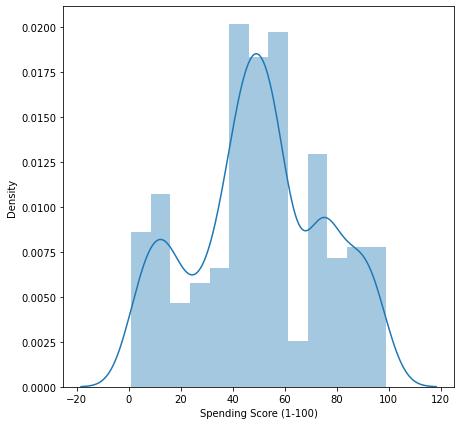

In [153]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(data[i])

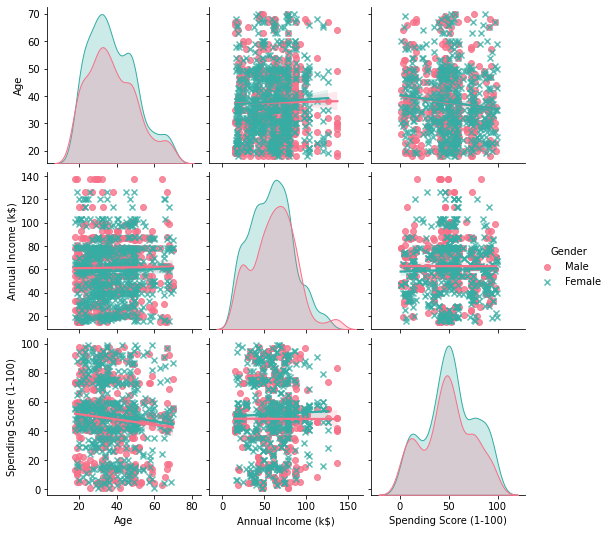

In [128]:
sns.pairplot(data, vars=["Age", "Annual Income (k$)", "Spending Score (1-100)"],  kind ="reg", hue = "Gender", palette="husl", markers = ['o','x'])

Three graphs represent the correlation between two (Age, Annual income) attributes

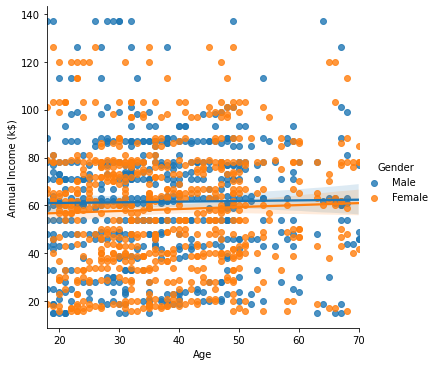

In [129]:
sns.lmplot(x = "Age", y = "Annual Income (k$)", data = data, hue = "Gender")

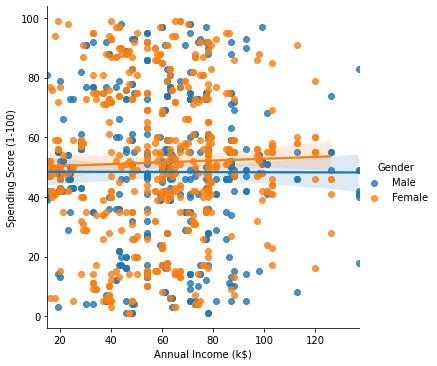

In [130]:
sns.lmplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = data, hue = "Gender")

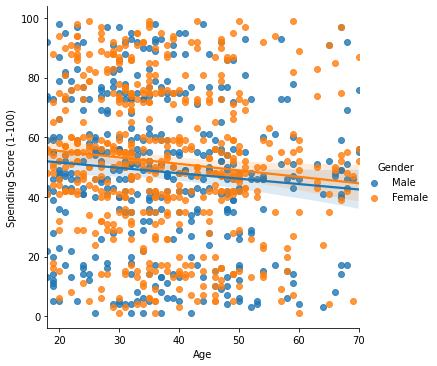

In [131]:
sns.lmplot(x = "Age", y = "Spending Score (1-100)", data = data, hue = "Gender")

In [133]:
trace1 = go.Scatter3d(
    x= data['Spending Score (1-100)'],
    y= data['Annual Income (k$)'],
    z= data['Age'],
    mode='markers',
     marker=dict(
        color = 'cornflowerblue', 
        size= 10,
        line=dict(
            color= 'cornflowerblue'
        ),
        opacity = 0.7
     )
)
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Spending_score'),
            yaxis = dict(title  = 'Annual_income'),
            zaxis = dict(title  = 'Age')
        )
)
fig = go.Figure(data=trace1, layout=layout)
py.offline.iplot(fig)

In [200]:
df5.head(5)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  City  \
0           1       1   19                  15                      39     1   
1           2       1   21                  15                      81     2   
2           3       2   20                  16                       6     3   
3           4       2   23                  16                      77     4   
4           5       2   31                  17                      40     5   

   Income Clusters  Spending and Income Cluster     Cluster  Cluster_(A.A.S)  \
0                0                            4  Low_Income                2   
1                0                            4  Low_Income                2   
2                0                            0  Low_Income                0   
3                0                            4  Low_Income                2   
4                0                            4  Low_Income                2   

  Customer Identification  
0        Young Adult Aged  
1        Young Adult Aged  
2        Young Adult Aged  
3        Young Adult Aged  
4             Middle-Aged

In [206]:
eda=df5.copy()

In [239]:
eda['Spending and Income Cluster'] = eda['Spending and Income Cluster'].replace([0,1,2,3,4],['Target',"Careful","Miser","Spendthrift",'General'])

In [229]:
eda['Gender'] = eda['Gender'].replace(['1','2'],['Male',"Female"])

In [262]:
eda['City'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [273]:
eda['City'] = eda['City'].replace([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],['New York', 'Seattle', 'Los Angeles', 'Chicago','Houston','Phoenix', 'Philadelphia', 'San Antonio', 'San Diego','Washington'])

In [274]:
eda

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0              1    Male   19                  15                      39   
1              2    Male   21                  15                      81   
2              3  Female   20                  16                       6   
3              4  Female   23                  16                      77   
4              5  Female   31                  17                      40   
...          ...     ...  ...                 ...                     ...   
1175        1176  Female   47                  88                      73   
1176        1177    Male   48                  88                      10   
1177        1178    Male   49                  88                      72   
1178        1179    Male   50                  93                       5   
1179        1180    Male   51                  93                      93   

              City  Income Clusters Spending and Income Cluster  \
0         New York                0                     General   
1          Seattle                0                     General   
2      Los Angeles                0                      Target   
3          Chicago                0                     General   
4          Houston                0                     General   
...            ...              ...                         ...   
1175       Chicago                1                 Spendthrift   
1176       Houston                1                      Target   
1177       Phoenix                1                 Spendthrift   
1178  Philadelphia                1                      Target   
1179   San Antonio                1                     Careful   

              Cluster  Cluster_(A.A.S)     Customer Identification  
0          Low_Income                2            Young Adult Aged  
1          Low_Income                2            Young Adult Aged  
2          Low_Income                0            Young Adult Aged  
3          Low_Income                2            Young Adult Aged  
4          Low_Income                2                 Middle-Aged  
...               ...              ...                         ...  
1175  Moderate_Income                3  Elderly / Late Middle Aged  
1176  Moderate_Income                0  Elderly / Late Middle Aged  
1177  Moderate_Income                3  Elderly / Late Middle Aged  
1178     High_Earners                3  Elderly / Late Middle Aged  
1179     High_Earners                3  Elderly / Late Middle Aged  

[1180 rows x 11 columns]

In [478]:
Male_g=eda[eda['Gender']=='Male']
Male_g.head(5)

CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0            1   Male   19                  15                      39   
1            2   Male   21                  15                      81   
8            9   Male   64                  19                       3   
10          11   Male   67                  19                      14   
14          15   Male   37                  20                      13   

         City  Income Clusters Spending and Income Cluster     Cluster  \
0    New York                0                     General  Low_Income   
1     Seattle                0                     General  Low_Income   
8   San Diego                0                      Target  Low_Income   
10    Seattle                0                      Target  Low_Income   
14    Phoenix                0                      Target  Low_Income   

    Cluster_(A.A.S) Customer Identification  
0                 2        Young Adult Aged  
1                 2        Young Adult Aged  
8                 0                Old-Aged  
10                3                Old-Aged  
14                0             Middle-Aged

Text(0.5, 1.0, 'Total points of purchases by Spending and Income segment')

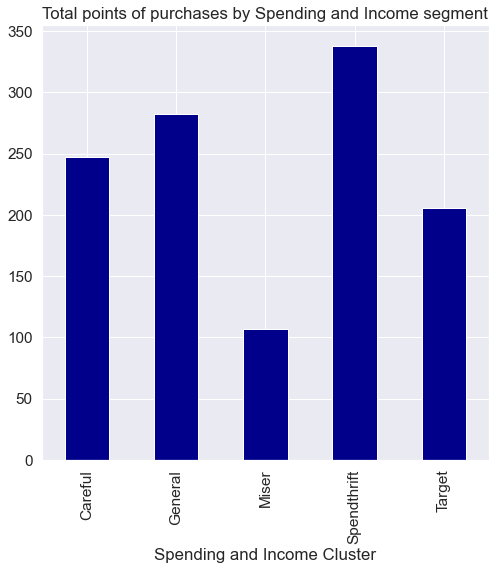

In [546]:
eda.groupby(['Spending and Income Cluster'])['CustomerID'].count().plot.bar(figsize=(8,8),color=['darkblue','darkblue','darkblue','darkblue','darkblue','darkblue'])
plt.title('Total points of purchases by Spending and Income segment')

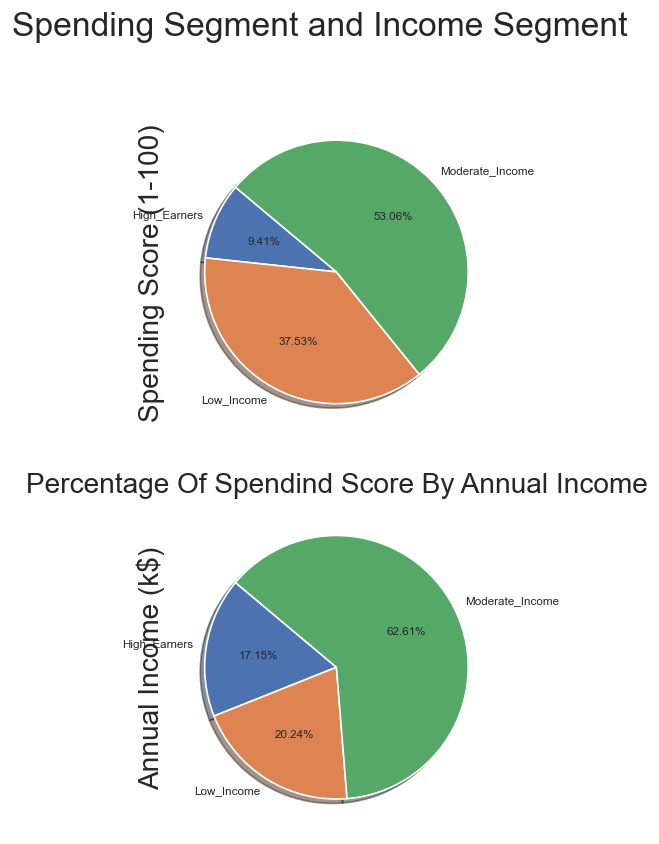

<Figure size 504x504 with 0 Axes>

In [540]:
colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red','tab:brown', 'tab:orange', 'tab:green', 'tab:purple', 'tab:yellow']
fig, (ax0,ax1) = plt.subplots(nrows=2,figsize=(3,3),dpi=120)
ax0=eda.groupby(['Cluster'])['Spending Score (1-100)'].sum().plot.pie(autopct='%.2f%%', textprops= {'fontsize': 7},figsize=(8,8),shadow= True, startangle= 140,ax=ax0)
# plt.title('Percentage Of Spendind Score By Annual Income')
ax1=eda.groupby(['Cluster'])['Annual Income (k$)'].sum().plot.pie(autopct='%.2f%%', textprops= {'fontsize': 7},figsize=(8,8),shadow= True, startangle= 140,ax=ax1)
plt.title('Percentage Of Spendind Score By Annual Income')
fig.suptitle('Spending Segment and Income Segment ')
plt.show()
plt.savefig('Percentage of Customer Segment & points of purchase by Spending and Income segment.png')

As it can be seen with Pie Chart above, counts of moderate customers based on annual income and spending score are vast in majority .

20.24% people from mall have low income but they spend more than moderate and high income ones.

62.61% people from mall have average income. But only 53.06% moderate income people spend money at mall.

High earners are 17.15% but when comes to spend money their counts are quite low.


This point should be noted , mall owner should bring some offers for mooderate and high earners.



# Which generation is spending the most in the mall ?

<Figure size 1440x648 with 0 Axes>

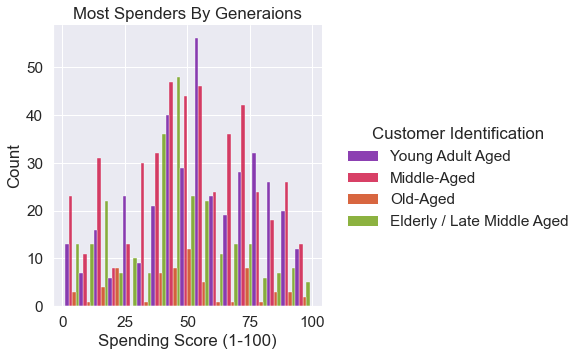

In [443]:
plt.figure(figsize=(20,9))
sns.displot(x=eda['Spending Score (1-100)'],hue=eda['Customer Identification'],multiple='dodge',palette='brg').set(title='Most Spenders By Generaions')
plt.show()

# Which generation of customers are earning the most ?

<Figure size 1440x648 with 0 Axes>

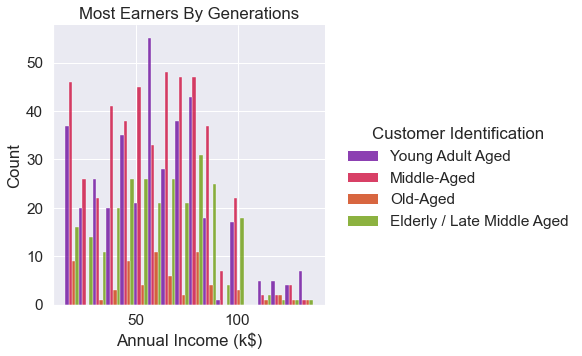

In [442]:
plt.figure(figsize=(20,9))
sns.displot(x=eda['Annual Income (k$)'],hue=eda['Customer Identification'],multiple='dodge',palette='brg').set(title='Most Earners By Generations')
plt.show()

In [527]:
len(eda[eda['Customer Identification']=='Young Adult Aged'])

380

In [532]:
len(eda[eda['Customer Identification']=='Middle-Aged'])

468

In [533]:
len(eda[eda['Customer Identification']=='Elderly / Late Middle Aged'])

264

In [534]:
len(eda[eda['Customer Identification']=='Old-Aged'])

68

# Which generation in male is earning the most?

In [455]:
mvc=Male_g['Customer Identification'].value_counts()
mvc

Middle-Aged                   209
Young Adult Aged              167
Elderly / Late Middle Aged    114
Old-Aged                       31
Name: Customer Identification, dtype: int64

In [466]:
Male_g.head(5)

CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0            1   Male   19                  15                      39   
1            2   Male   21                  15                      81   
8            9   Male   64                  19                       3   
10          11   Male   67                  19                      14   
14          15   Male   37                  20                      13   

         City  Income Clusters Spending and Income Cluster     Cluster  \
0    New York                0                     General  Low_Income   
1     Seattle                0                     General  Low_Income   
8   San Diego                0                      Target  Low_Income   
10    Seattle                0                      Target  Low_Income   
14    Phoenix                0                      Target  Low_Income   

    Cluster_(A.A.S) Customer Identification  
0                 2        Young Adult Aged  
1                 2        Young Adult Aged  
8                 0                Old-Aged  
10                3                Old-Aged  
14                0             Middle-Aged

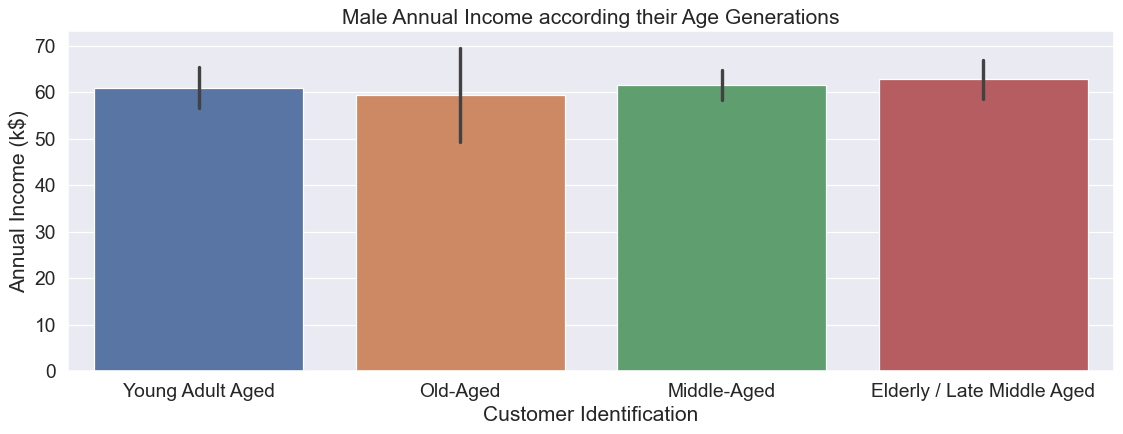

In [483]:
plt.figure(figsize=(15,5),dpi=90)
sns.barplot(data=Male_g,x=Male_g['Customer Identification'],y=Male_g['Annual Income (k$)']).set(title='Male Annual Income according their Age Generations')
plt.show()

Not much big difference in men but Late middle Aged earn more than others.

# Which generation in male is spending the most at mall?

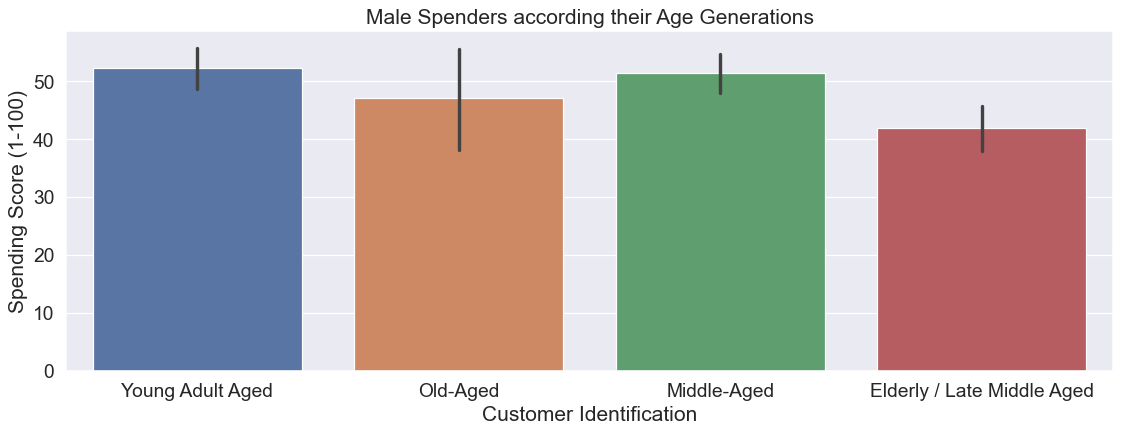

In [482]:
plt.figure(figsize=(15,5),dpi=90)
sns.barplot(data=Male_g,x=Male_g['Customer Identification'],y=Male_g['Spending Score (1-100)']).set(title='Male Spenders according their Age Generations')
plt.show()

Young Adult Aged(18-30) spend most at malls leaving behind Middle Aged people with few counts . 

While, Elder Aged and Old Aged people do less shopings as compare to young and middle aged ones. 

# Which generation in female is earning the most?

In [480]:
Female_g=eda[eda['Gender']=='Female']
fvc=Female_g['Customer Identification'].value_counts()
fvc

Middle-Aged                   259
Young Adult Aged              213
Elderly / Late Middle Aged    150
Old-Aged                       37
Name: Customer Identification, dtype: int64

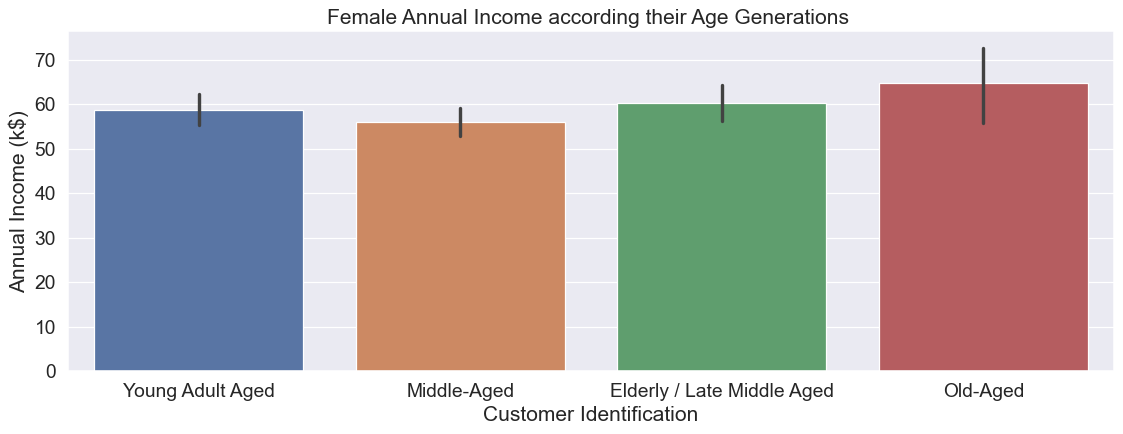

In [484]:
plt.figure(figsize=(15,5),dpi=90)
sns.barplot(data=Female_g,x=Female_g['Customer Identification'],y=Female_g['Annual Income (k$)']).set(title='Female Annual Income according their Age Generations ')
plt.show()

Old aged womens are earning most compare to other three.

# Which generation in female is spending the most?

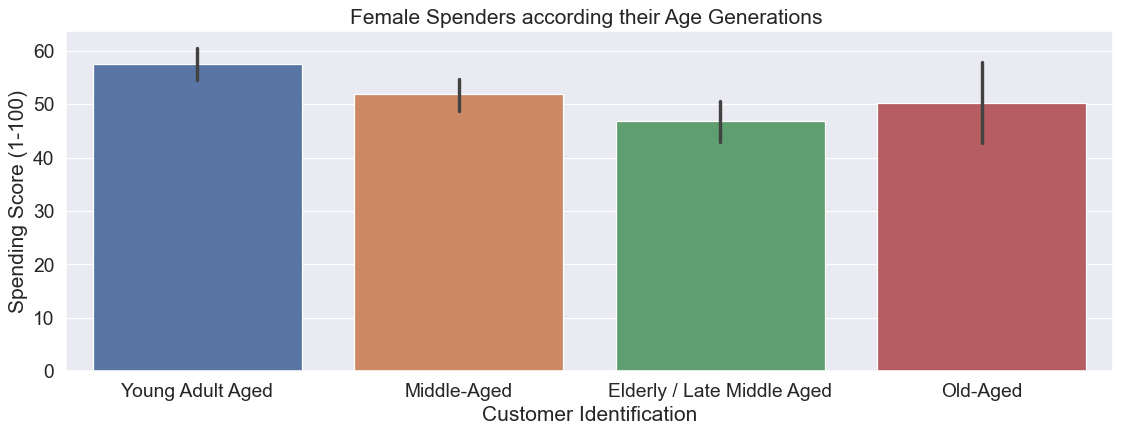

In [486]:
plt.figure(figsize=(15,5),dpi=90)
sns.barplot(data=Female_g,x=Female_g['Customer Identification'],y=Female_g['Spending Score (1-100)']).set(title='Female Spenders according their Age Generations ')
plt.show()

Young aged in female category spends more money as compare to other categories.

whats more shocking is that old aged women have more spending score than middle age women.

In [360]:
eda.groupby(['City'])['Spending Score (1-100)'].sum()

City
Chicago         6874
Houston         6719
Los Angeles     6738
New York        3521
Philadelphia    6960
Phoenix         6938
San Antonio     6866
San Diego       6860
Seattle         3543
Washington      5295
Name: Spending Score (1-100), dtype: int32

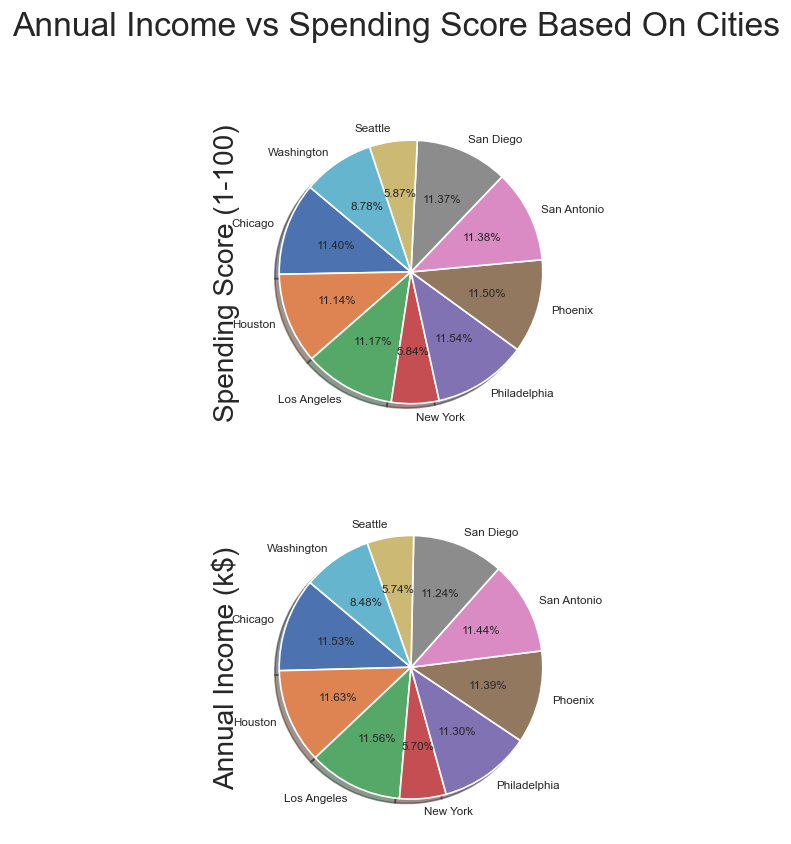

<Figure size 504x504 with 0 Axes>

In [444]:
colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red','tab:brown', 'tab:orange', 'tab:green', 'tab:purple', 'tab:yellow']
fig, (ax0,ax1) = plt.subplots(nrows=2,figsize=(1,3),dpi=120)
ax0=eda.groupby(['City'])['Spending Score (1-100)'].sum().plot.pie(autopct='%.2f%%',textprops= {'fontsize': 7}, figsize=(8,8),shadow= True, startangle= 140,ax=ax0)
# plt.title('Percentage Of Spending Score Based on Cities')

ax1=eda.groupby(['City'])['Annual Income (k$)'].sum().plot.pie(autopct='%.2f%%',textprops= {'fontsize': 7}, figsize=(10,8),shadow= True, startangle= 140,ax=ax1)
# plt.title('Percentage Of Spending Score & Annual Income Based on Cities')
fig.suptitle('Annual Income vs Spending Score Based On Cities')
plt.show()
plt.savefig('Annual Income vs Spending Score Based On Cities.png')


Chicago , Houston, Los Angeles, Philadelphia, Phoenix, San Antonio and San Diego are best cities for do businesses. 

Also people from these cities having high income.


# Who Spends most between Male And Female?

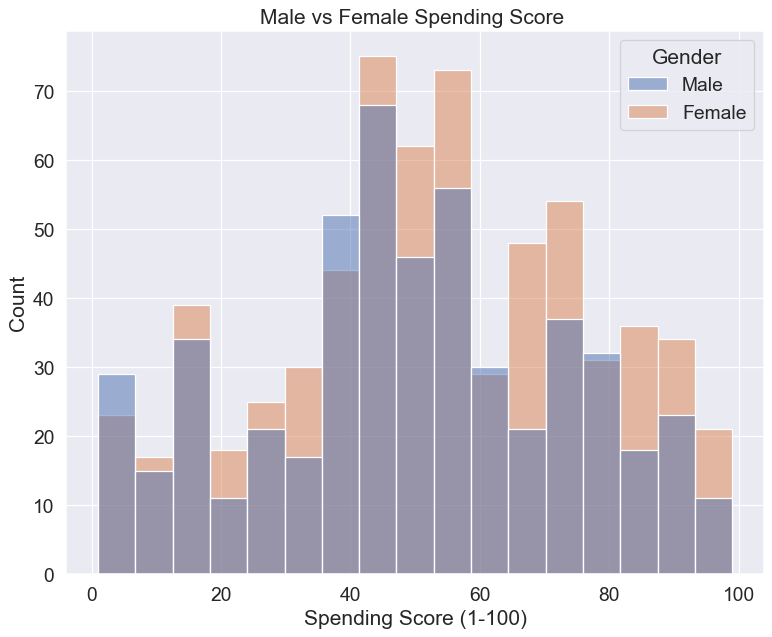

In [346]:
fig = plt.figure(figsize=(10,8),dpi=90)
sns.histplot(data=eda,x=eda['Spending Score (1-100)'] ,hue=eda['Gender'] ).set(title='Male vs Female Spending Score ')
plt.show()

Women do more shopping than men as we know.

But from this plot , we can also aspect that women has more spending score as compare to men .


# What gender is most likely to shop at mall as per city?

<ipython-input-439-4e33b8b65855>:6: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



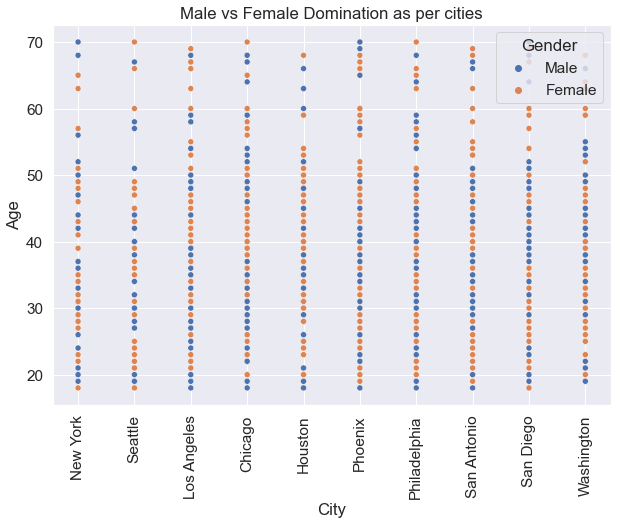

In [439]:
# fig = plt.figure(figsize=(10,8),dpi=90)
# sns.displot(data=eda,x=eda['City'] ,hue=eda['Age'] ,multiple='dodge').set(title='Male vs Female Spending Score ')
# plt.show()
fig = plt.figure(figsize=(10,7))
sns.scatterplot(data=eda,x=eda['City'] ,y=eda['Age'],hue='Gender').set(title='Male vs Female Domination as per cities')
plt.xticks(Rotation=90)
plt.show()

# Which generation is most likely to shop at mall as per city?

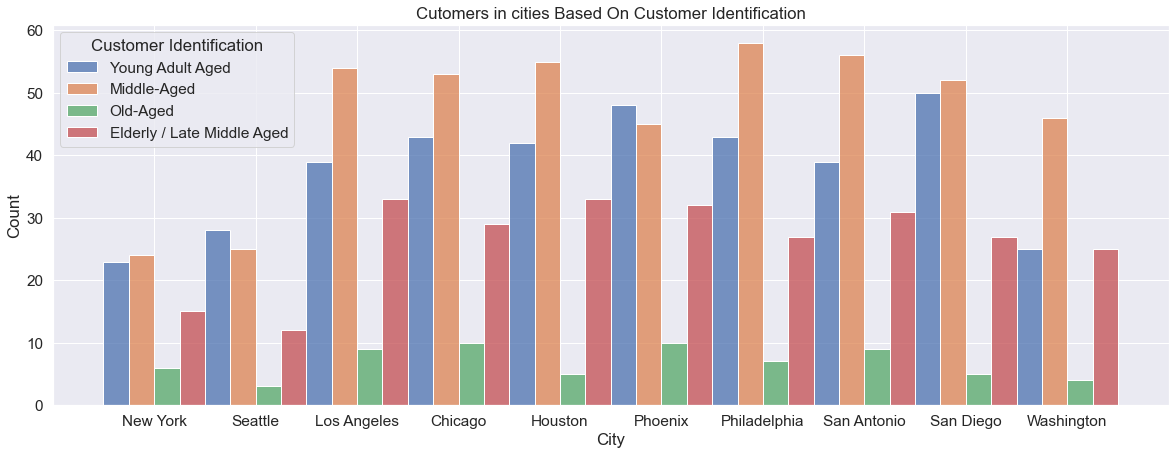

In [340]:
plt.figure(figsize=(20,7))
sns.histplot(x=eda['City'],hue=eda['Customer Identification'],multiple='dodge').set(title='Cutomers in cities Based On Customer Identification')
plt.show()

From above plot , we can assume that Middle aged people outnumbered other generations.
Also , they are the most reponsible people of the house.

Following with middle aged people , young ones are on 2nd rank when it comes to spending money.

Along with elderly and old spend few as compare to middle aged ones and young one's.

New york ,Washington and Seattle has lowest customers while Los Angeles , Chicago, Houston , Phoenix , Philadelphia , San Antonio and San Diego has highest customers.



# Which cities has the most Spendthrifts and Target Customers ? Which is the most profitable city for shopping malls?


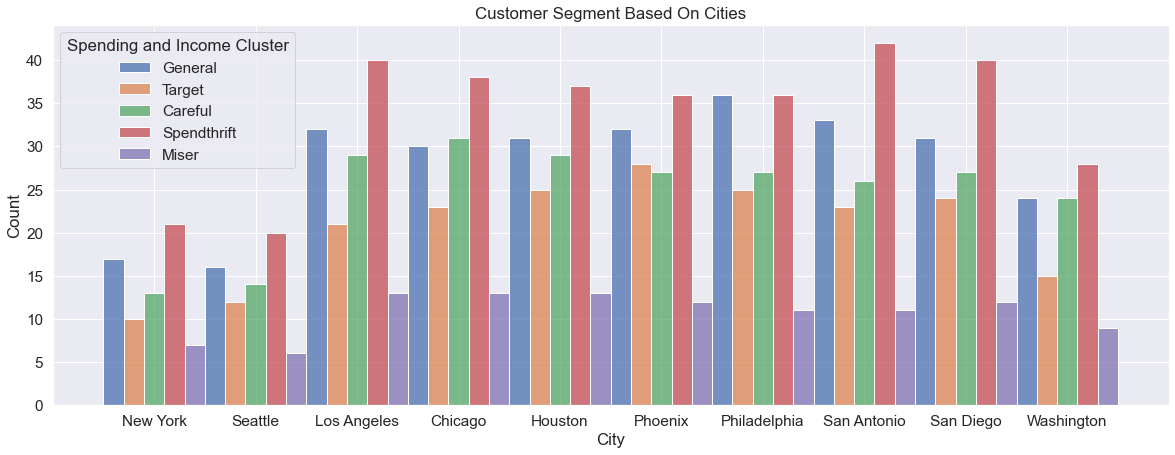

In [321]:
plt.figure(figsize=(20,7))
sns.histplot(x=eda['City'],hue=eda['Spending and Income Cluster'],multiple='dodge').set(title='Customer Segment Based On Cities')
plt.show()

Los Angeles , Chicago, Houston , Phoenix , Philadelphia , San Antonio and San Diego has highest numbers of customers who are spendthrift and Target customers.

Malls can do more business if they come with new ideas , products and offers for customers in those cities.

# Classification Of Customers By Annual Income ? 

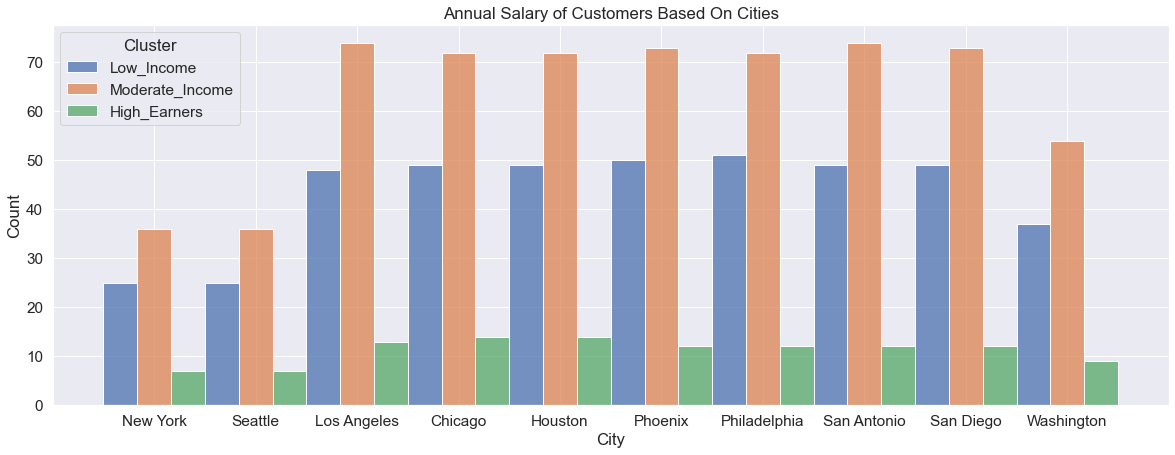

In [339]:
plt.figure(figsize=(20,7))
sns.histplot(x=eda['City'],hue=eda['Cluster'],multiple='dodge').set(title='Classification of customers from cities')
plt.show()

Los Angeles , Chicago, Houston , Phoenix , Philadelphia , San Antonio and San Diego has highest numbers moderate,low and high earners

In [498]:
df5.to_csv('Mall_Clustered_Data.csv') # saving data set

In [499]:
eda.to_csv('Mall_Clustered_cat_Data.csv') # saving data set

# CONCLUSION :-

# TASK 1 : SEGMENT BASED ON THE USERS SPENDING

General :- In this Category , these types of Customers has Average Annual income with average Spending Score . Hence, we can conclude that these types of people are normal customers who buy and spent according their montly needs.These customers will not be the prime targets of the shops or mall, but they can be considered.

Miser :- In this Category ,these types of Customers has Average and Below Average Annual income with low Spending Score . Hence, we can conclude that these types of people are Balanced customers.These customers will not be the prime targets of the shops or mall.

Careful :- In this Category ,these types of Customers has High Annual income with low Spending Score . Hence, we can conclude that these types of people are Careful customers who buy only what they want .These customers could be the targets of the shops or mall.Because their income is so high as compare to other customers.

Spendthrift :- In this Category , these types of Customers has low income with high Spending Score . Hence, we can conclude that these types of people are Shopoholics who buy blindly .These customers could be the targets of the shops or mall. Because they love to buy products more often even though they have a low income.

Target :-In this Category , these types of Customers has Average and above high income with high spending score. Hence, we can conclude that these types of people are target constomers. These customers should be the prime targets of the shops or mall as these people are the prime sources of profit.

Centroid :- Center of the segments.

# TASK 2 : AGE SEGMENT

In this category, Customers are Middle-aged people between 30-40 who have moderate income with low spending score.
They are responsible family members earning a considerable income and having a status in the society. These types of customers are generally proud of their achievements, possession and position. Such customers, because of their age and experience are proud of themselves. They are very much conscious about the quality but not about fashion.
Shops or malls owners should bring some offers for these people. So that they could increase their purchases.

(Tips:- 
1. Shops or malls should be very clever and tactful while dealing with middle-aged customers. Owners should never try to bluff them about the quality and price of goods. 
2. Shops or malls owners should compliment them for their achievements and status in the society. And must emphasize on buying motives like pride, possession, and profit to win over the customers.)


    
In this category, Customers are young-aged people between 20-30 who have High Annual income with high spending score.They are generally impatient as well as smart. They generally want to enjoy life by purchasing the most up-to-date and fashionable commodities. Because of their impatience, they get irritated soon. As such they take quick decisions in purchases. They are very particular about fashion, latest design and colour. They lack experience in purchasing articles and are also not argumentative.These Customers should be considered as the prime targets of the shops or malls.

(Tips:- 
1. These customers should be provided with the latest designs and colours to make a choice.)


    
In this category, Customers are Middle-aged people between 30-35 who have low Annual income with high spending score.
These Customers can also be considered as the prime targets of the shops or malls.

(Tips:- 
1. Shops or malls should be very clever and tactful while dealing with middle-aged customers. Owners should never try to bluff them about the quality and price of goods. 
2. Shops or malls owners should compliment them for their achievements and status in the society. And must emphasize on buying motives like pride, possession, and profit to win over the customers.)


    
In this category, Customers are Old-aged people between 50-90 who have low Annual income with moderate spending score. Elderly and old aged customers generally are experienced in buying goods. These customers are serious and cautious in money matters. They do not like to be advised by the salesman. They feel proud if they are given respect and consulted. They like to be appreciated for their experience and wisdom. These Customers can also be considered as the targets of the shops or malls.

(Tips:-
1. Its not easy to satisfy Elderly customers. The salesman should appreciate their wisdom and experience. He should try to give as much respect as he can and try to seek advice in order to please them.
2. They are very sensitive and, therefore, the salesman should be very cautious in his approach. The salesman has to talk about every detail of the goods to these customers and therefore, the sale takes a long time.)

1.Los Angeles , Chicago, Houston , Phoenix , Philadelphia , San Antonio and San Diego has highest numbers moderate,low and high earners.And also the highest number of spendthrift and target customers comes from these cities.

2.30 to 45 aged people do more purchases.

3.Women do more shopping than men .

4.Young aged (18-30) in both male and female category spends alot.

5.In  womens ,61 to 90 are earning the most .

6.In mens, 46 to 60 Aged are earning the most.

7.Men's are earning more than women.Highest paid between male and female is male.

8.Improvements to be made in service and quality can increase the spending of high-income customers who come to the store.

9.I think the best strategy would be to target high-income customers. The reason is that some of the high-income customers spend high, while a significant portion of these customers spend low, there may be some things that low-spenders are not satisfied. 

10.In addition, it seems that the audience between the ages of 20-40 spend more in this store compared to people in other age groups, making special campaigns for the audience between the ages of 20-40 can increase the profit of the supermarket.